<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/ZProMax/case_study2a/cs2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flow of patients in/out of Covid-19 Quarantine and Treatment Centres (PKRC), with capacity and utilisation <a href="https://colab.research.google.com/drive/1fIzJFIGP_y2AzPozRGjQZSwtxUnM021d" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is about an exploratory data analysis (EDA) on the PKRC of Covid-19 Per State using Python. The dataset [```pkrc.csv```](https://github.com/MoH-Malaysia/covid19-public/blob/main/epidemic/pkrc.csv) is basically regarding the flow of patients to/out of Covid-19 Quarantine and Treatment Centres (PKRC), with capacity and utilisation. This dataset was sourced from the repositories associated with MoH Malaysia github account. We used Pandas, Numpy, SciPy, Seaborn, Matplolib and Plotly to process, clean, analyze, and visualize the data.


#### Group Members
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| NG SUANG JOO | A21EC0102 | Case Study 1, 2a  
| LING WAN YIN | A21EC0047 | Case Study 1, 2b
| FONG KHAH KHEH | A21EC0026 | Case Study 1, 2c



## Tools Selected: SweetViz

## Installation




In [1]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.7 MB/s eta 0:00:00


In [3]:
# @title Import pandas and numpy library
import pandas as pd
import numpy as np

In [4]:
# @title Read the dataset
url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/pkrc.csv'
dataset = pd.read_csv(url)

In [5]:
# @title Load the dataset into a Pandas Data Frame
df = pd.DataFrame(dataset)
display(df)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
0,2020-03-28,Kelantan,147,0,0,0,0,0,0,0,53,0
1,2020-03-28,Perlis,54,0,0,0,0,0,0,8,3,0
2,2020-03-28,Pulau Pinang,58,0,0,0,0,0,0,13,0,0
3,2020-03-28,Sarawak,74,0,0,0,0,0,0,22,0,0
4,2020-03-28,Selangor,1452,0,12,12,0,5,5,145,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-11-27,Sabah,15,0,0,0,0,14,14,0,0,0
9996,2022-11-28,Sabah,15,0,0,0,0,0,0,0,0,0
9997,2022-11-29,Sabah,15,0,0,0,0,0,0,0,0,0
9998,2022-11-30,Sabah,15,0,0,0,0,0,0,0,0,0


To know the number of rows and columns:

In [6]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (10000, 12)


To know the column name:

In [7]:
print("Column names:", df.columns)

Column names: Index(['date', 'state', 'beds', 'admitted_pui', 'admitted_covid',
       'admitted_total', 'discharged_pui', 'discharged_covid',
       'discharged_total', 'pkrc_covid', 'pkrc_pui', 'pkrc_noncovid'],
      dtype='object')


To know the type of data

In [8]:
print("Data types of columns:", df.dtypes)

Data types of columns: date                object
state               object
beds                 int64
admitted_pui         int64
admitted_covid       int64
admitted_total       int64
discharged_pui       int64
discharged_covid     int64
discharged_total     int64
pkrc_covid           int64
pkrc_pui             int64
pkrc_noncovid        int64
dtype: object


Range of values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              10000 non-null  object
 1   state             10000 non-null  object
 2   beds              10000 non-null  int64 
 3   admitted_pui      10000 non-null  int64 
 4   admitted_covid    10000 non-null  int64 
 5   admitted_total    10000 non-null  int64 
 6   discharged_pui    10000 non-null  int64 
 7   discharged_covid  10000 non-null  int64 
 8   discharged_total  10000 non-null  int64 
 9   pkrc_covid        10000 non-null  int64 
 10  pkrc_pui          10000 non-null  int64 
 11  pkrc_noncovid     10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


To handle missing value:

In [ ]:
df.isnull().sum()

date                0
state               0
beds                0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
pkrc_covid          0
pkrc_pui            0
pkrc_noncovid       0
dtype: int64

Since there is no missing value, lets find if there is any ambiguous in the **State** column

In [ ]:
df['state'].unique()

array(['Kelantan', 'Perlis', 'Pulau Pinang', 'Sarawak', 'Selangor',
       'W.P. Labuan', 'Perak', 'Johor', 'Negeri Sembilan', 'Sabah',
       'Melaka', 'Pahang', 'Kedah', 'Terengganu', 'W.P. Kuala Lumpur',
       'W.P. Putrajaya'], dtype=object)

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
display(df)

,date,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid,year
0,2020-03-28,Kelantan,147,0,0,0,0,0,0,0,53,0,2020
1,2020-03-28,Perlis,54,0,0,0,0,0,0,8,3,0,2020
2,2020-03-28,Pulau Pinang,58,0,0,0,0,0,0,13,0,0,2020
3,2020-03-28,Sarawak,74,0,0,0,0,0,0,22,0,0,2020
4,2020-03-28,Selangor,1452,0,12,12,0,5,5,145,0,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-11-27,Sabah,15,0,0,0,0,14,14,0,0,0,2022
9996,2022-11-28,Sabah,15,0,0,0,0,0,0,0,0,0,2022
9997,2022-11-29,Sabah,15,0,0,0,0,0,0,0,0,0,2022
9998,2022-11-30,Sabah,15,0,0,0,0,0,0,0,0,0,2022


#Implementation of Automated EDA tool

In [9]:
import sweetviz as sv

In [10]:
my_report = sv.analyze(dataset)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**The HTML file can be download from the left panel -> Files**

##The Pros and Cons of SweetViz

**Pros**
1. Automated EDA

Sweetviz automates the process of creating extensive visualizations, saving time compared to creating individual plots manually.

2. Visualizations Variety

It generates a variety of visualizations, including histograms, scatter plots, and density plots, providing a rich set of insights.

3. User-Friendly Output

The visualizations are presented in a user-friendly and interactive HTML report, making it easy to share and explore.


**Cons**
1. Dependent on Pandas

Sweetviz heavily relies on the Pandas library, and if your data is not structured as a Pandas DataFrame, you might need to preprocess it to use Sweetviz effectively.

2. Limited Customization

While it offers some customization, Sweetviz might not be as flexible as other visualization libraries when it comes to customizing the appearance of individual plots.

3. Interactivity Limitations

The interactivity in the HTML report is limited compared to tools like Tableau or Plotly. Users can interact with the plots to some extent, but it's not as dynamic.


##Conclusion

*   The total of individuals ever stayed in PKRC Covid reached up to 5.3 Millions while PKRC PUI is only 232K and PKRC Noncovid is 144K.
*   The maximum of individuals ever stayed in PKRC Covid reached up to 6685 per day while PKRC PUI is only 1079 per day and PKRC Noncovid is 884 per day.
*   The total discharge from PKRC is 745K.



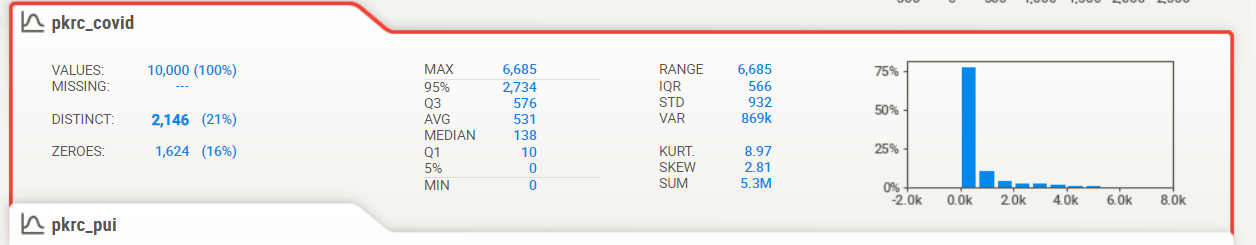

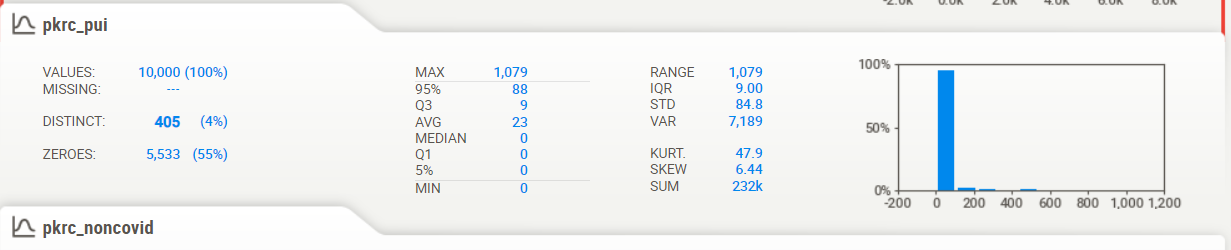

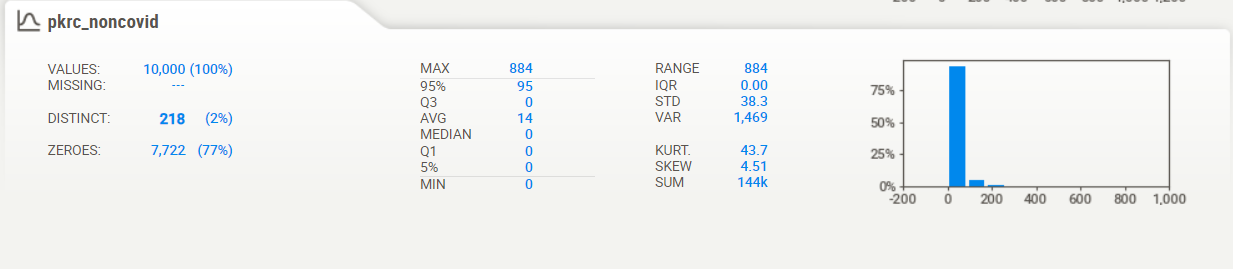

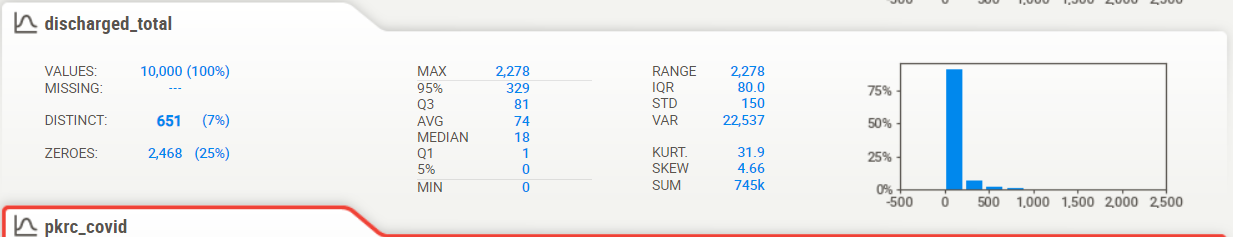